In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Bolu\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
housing = pd.read_csv('housing.txt')

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Exploratary Data Analysis

In [4]:
housing = housing.loc[(housing['ocean_proximity'] == '<1H OCEAN') | (housing['ocean_proximity'] == 'INLAND')].copy()

In [5]:
df_housing = housing.loc[:,['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']].reset_index(drop=True)
df_housing

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
1,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
2,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
3,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
4,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
15682,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
15683,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
15684,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
15685,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [6]:
df_housing.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [7]:
df_housing.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15687.000000,15687.000000,15687.000000,15687.000000,15530.000000,15687.000000,15687.000000,15687.000000,15687.000000
mean,35.467307,-119.217442,27.188118,2665.677312,541.244688,1466.317205,500.916491,3.804019,191943.020017
std,2.066387,1.780380,12.057128,2257.672743,435.650018,1180.389908,392.759399,1.857158,108801.077620
min,32.610000,-124.140000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,33.940000,-121.070000,17.000000,1441.000000,295.000000,802.000000,278.000000,2.520800,111300.000000
50%,34.160000,-118.370000,27.000000,2118.000000,432.000000,1195.000000,406.000000,3.468800,166900.000000
75%,37.340000,-117.990000,36.000000,3172.000000,645.000000,1777.000000,602.000000,4.686200,241100.000000
max,41.950000,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
n = len(df_housing)
n_train = int(0.6 * n)
n_val = int(0.2 * n)
n_test = n - n_train - n_val

idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

df_housing_shuffled = df_housing.iloc[idx]
df_housing_shuffled

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
15183,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
4469,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
9316,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
4983,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
13154,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0
...,...,...,...,...,...,...,...,...,...
5191,34.15,-118.14,41.0,1256.0,407.0,855.0,383.0,1.9923,500001.0
13418,37.40,-121.86,19.0,4043.0,764.0,2196.0,708.0,6.1504,268400.0
5390,34.07,-118.15,52.0,1983.0,344.0,887.0,331.0,3.2875,234400.0
860,36.78,-119.81,37.0,1965.0,364.0,796.0,335.0,3.6250,83400.0


In [9]:
df_housing_train = df_housing_shuffled.iloc[:n_train].copy()
df_housing_val = df_housing_shuffled.iloc[n_train:n_val].copy()
df_housing_test = df_housing_shuffled.iloc[n_val:].copy()

In [10]:
y_train = np.log1p(df_housing_train.median_house_value.values)
y_val = np.log1p(df_housing_val.median_house_value.values)
y_test = np.log1p(df_housing_test.median_house_value.values)

del df_housing_train['median_house_value']
del df_housing_val['median_house_value']
del df_housing_test['median_house_value']

In [11]:
def prepare(df):
    df = df.fillna(0)
    X = df.values
    return X

In [12]:
def lin_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX += reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [13]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [14]:
X_train = prepare(df_housing_train)
w0, w = lin_reg(X_train, y_train)
w0

-9.760282389310394

In [15]:
y_pred = w0 + X_train.dot(w)

error = rmse(y_train, y_pred)
round(error,2)

0.34

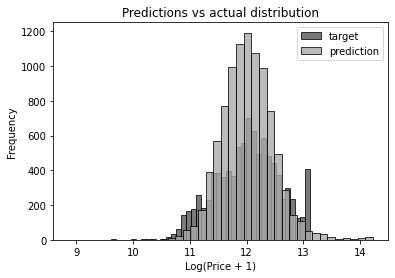

In [16]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [17]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = lin_reg(X_train, y_train, r=r)
    y_pred = w0 + X_train.dot(w)
    error = rmse(y_train, y_pred)
    print('%5s, %.2f, %.5f' % (r, w0, error))

    0, -9.76, 0.34026
1e-06, -9.76, 0.34026
0.0001, -9.76, 0.34026
0.001, -9.74, 0.34026
 0.01, -9.56, 0.34027
  0.1, -8.06, 0.34048
    1, -3.13, 0.34349
    5, -0.84, 0.34609
   10, -0.44, 0.34662
